# Optimal metrics on the space of rankings for Social Choice Theory

The analysis of properties of Social Function is focal point of Social Choice Theory. In the Arrow's framework there is a group of individuals who has to choose among a set $\{1,..., k\} =: A_k$ of alternatives. Each individual gives his vote through a linear order on $A_k$. A Social Function takes as input an electoral profile and returns the winner alternatives. There is a large class of Social Functions that can be defined starting from a "metric" on the space of rankings $L(A_k)$ with alternatives $A_k$, for instance the Kemeny's Social Preference Function, the Score Social Choice Functions as the Plurality or the Borda's one. 

## New Functions for the Project Social Choice and Preference

In [45]:
# librerie
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt

# funzioni principali
def multiply_permutations(perm1, perm2):
    """Product of two permutations"""
    return [perm1[i] for i in perm2]

def inverse_permutation(perm):
    perm = np.array(perm)
    inv_perm = np.zeros_like(perm)
    inv_perm[perm] = np.arange(len(perm))
    return inv_perm

def find_tuple(lst_of_tuples, target_tuple):
    for i, t in enumerate(lst_of_tuples):
        if t == target_tuple:
            return i 
    return -1

def project_simplex(y):
    y_sorted = np.sort(y)[::-1]
    cumsum = np.cumsum(y_sorted)
    rho = np.where(y_sorted + (1 - cumsum) / (np.arange(len(y)) + 1) > 0)[0][-1]
    lambda_val = (cumsum[rho] - 1) / (rho + 1)
    return np.maximum(y - lambda_val, 0)

class SimplexPSO:
    def __init__(self, n_particles, dim, objective_func, max_iter=100):
        self.n_particles = n_particles
        self.dim = dim
        self.objective_func = objective_func
        self.max_iter = max_iter
        self.omega = 0.9
        self.c1 = 2.0
        self.c2 = 2.0
        self.velocity_history = []
        
        # Inizializza posizioni e velocità
        self.positions = np.random.dirichlet(np.ones(dim), size=n_particles)
        self.velocities = np.zeros((n_particles, dim))
        
        # Inizializza pbest e gbest
        self.pbest = self.positions.copy()
        self.pbest_scores = np.array([objective_func(p) for p in self.positions])
        self.gbest = self.pbest[np.argmin(self.pbest_scores)]
        self.gbest_score = np.min(self.pbest_scores)
    
    def optimize(self):
        gbest_scores = [] # convergenza
        for _ in range(self.max_iter):
            for i in range(self.n_particles):
                # Aggiorna velocità
                r1, r2 = np.random.rand(2)
                self.velocities[i] = (self.omega * self.velocities[i] +
                                      self.c1 * r1 * (self.pbest[i] - self.positions[i]) +
                                      self.c2 * r2 * (self.gbest - self.positions[i]))
                
                # Aggiorna posizione e proietta
                new_position = self.positions[i] + self.velocities[i]
                new_position = project_simplex(new_position)
                
                # Valutazione
                score = self.objective_func(new_position)
                
                # Aggiorna pbest e gbest
                if score < self.pbest_scores[i]:
                    self.pbest[i] = new_position
                    self.pbest_scores[i] = score
                    if score < self.gbest_score:
                        self.gbest = new_position
                        self.gbest_score = score
            self.omega *= 0.99  # Decresce l'inerzia
            gbest_scores.append(self.gbest_score)
            self.velocity_history.append(self.velocities.copy())
        return self.gbest, self.gbest_score, gbest_scores
    
    
def Preference(vector):
    MCiterations = 100
    eps = 1
    fact = np.math.factorial(k)
    random_matrix = np.zeros((fact, fact)) # inizializzazione matrice delle distanze
    random_matrix[0,1:] = vector
    for i in range(1, random_matrix.shape[0]):
        for j in range(i+1, random_matrix.shape[1]):
            r = tuple(multiply_permutations(multiply_permutations(L[i], inverse_permutation(L[j])), L[0]))
            random_matrix[i,j] = random_matrix[0, find_tuple(L, r)]
    random_matrix = random_matrix + random_matrix.T - np.diag(random_matrix.diagonal()) # matrice simmetrica
    valori_minimi = np.zeros(MCiterations)
    for i in range(MCiterations):
        C = np.random.choice(np.arange(len(L)), n, replace=True)
        sommaTot = np.zeros(len(L))
        for y in range(len(L)):
            sommaF = 0
            for j in C:
                sommaF += random_matrix[y, j]
            sommaTot[y] = sommaF
        minimo = np.min(sommaTot)
        valori_minimi[i] = np.sum((sommaTot >= minimo - eps) & (sommaTot <= minimo + eps))
    meanMin = np.mean(valori_minimi)
    return meanMin

def Choice(vector):
    MCiterations = 100
    eps = 0.1
    fact = np.math.factorial(k)
    random_matrix = np.zeros((fact, k)) # inizializzazione matrice delle distanze
    vectorTmp = np.zeros(len(vector) + 1)
    vectorTmp[1:] = vector
    random_matrix[0,:] = vectorTmp
    for i in range(random_matrix.shape[0]):
        for j in range(random_matrix.shape[1]):
            random_matrix[i,j] = vectorTmp[L[i][j]]
    valori_minimi = np.zeros(MCiterations)
    for i in range(MCiterations):
        C = np.random.choice(np.arange(len(L)), n, replace=True)
        sommaTot = np.zeros(k)
        for y in range(k):
            sommaF = 0
            for j in C:
                sommaF += random_matrix[j, y]
            sommaTot[y] = sommaF
        minimo = np.min(sommaTot)
        valori_minimi[i] = np.sum((sommaTot >= minimo - eps) & (sommaTot <= minimo + eps))
    meanMin = np.mean(valori_minimi)
    return meanMin

# Choice

## Scenario 1

In [46]:
n = 10
k = 3
items = np.array(range(k))
L = list(itertools.permutations(items))

In [47]:
# Choice
pso = SimplexPSO(n_particles=30, dim=k-1, objective_func=Choice, max_iter=100)
best_position_choice, best_score_choice, history = pso.optimize()
print("Miglior posizione:", best_position_choice)
print("Somma miglior posizione:", sum(best_position_choice))
print("Miglior score:", best_score_choice)

Miglior posizione: [0.88605592 0.11394408]
Somma miglior posizione: 1.0
Miglior score: 1.0


## Trace Plot convergenza PSO

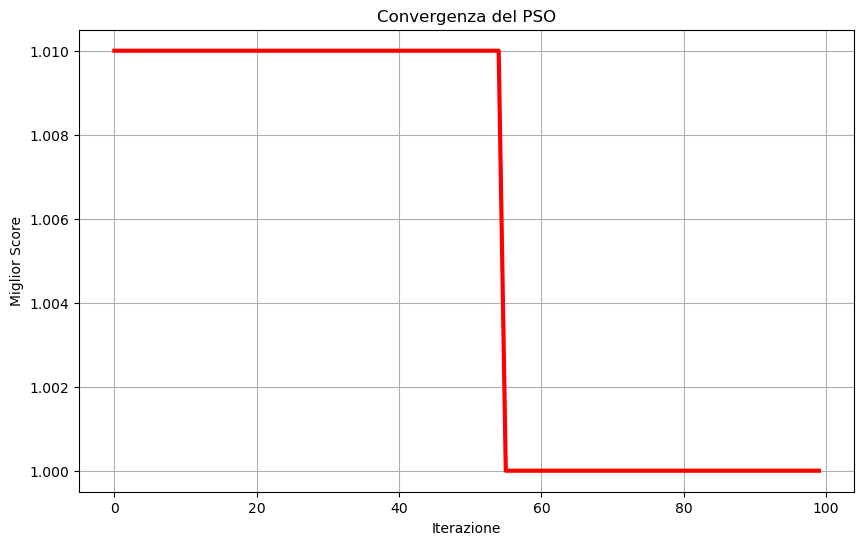

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(history, 'r-', linewidth=3)
plt.title('Convergenza del PSO')
plt.xlabel('Iterazione')
plt.ylabel('Miglior Score')
plt.grid(True)
plt.show()

## Velocity delle particelle

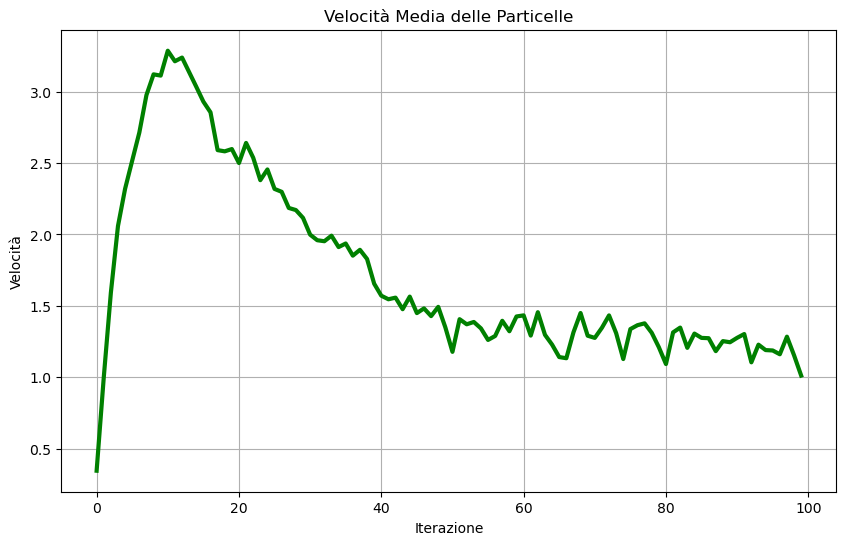

In [50]:
mean_velocities = [np.mean(np.linalg.norm(v, axis=1)) for v in pso.velocity_history]
plt.figure(figsize=(10, 6))
plt.plot(mean_velocities, 'g-', linewidth=3)
plt.title('Velocità Media delle Particelle')
plt.xlabel('Iterazione')
plt.ylabel('Velocità')
plt.grid(True)
plt.show()

# Preference

## Scenario 1

In [57]:
n = 10
k = 3
items = np.array(range(k))
L = list(itertools.permutations(items))

In [58]:
# Preference
pso = SimplexPSO(n_particles=30, dim=np.math.factorial(k)-1, objective_func=Preference, max_iter=100)
best_position_pref, best_score_pref, history = pso.optimize()
print("Miglior posizione:", best_position_pref)
print("Somma miglior posizione:", sum(best_position_pref))
print("Miglior score:", best_score_pref)

Miglior posizione: [0.94804246 0.05195754 0.         0.         0.        ]
Somma miglior posizione: 1.0
Miglior score: 2.9


## Trace Plot convergenza PSO

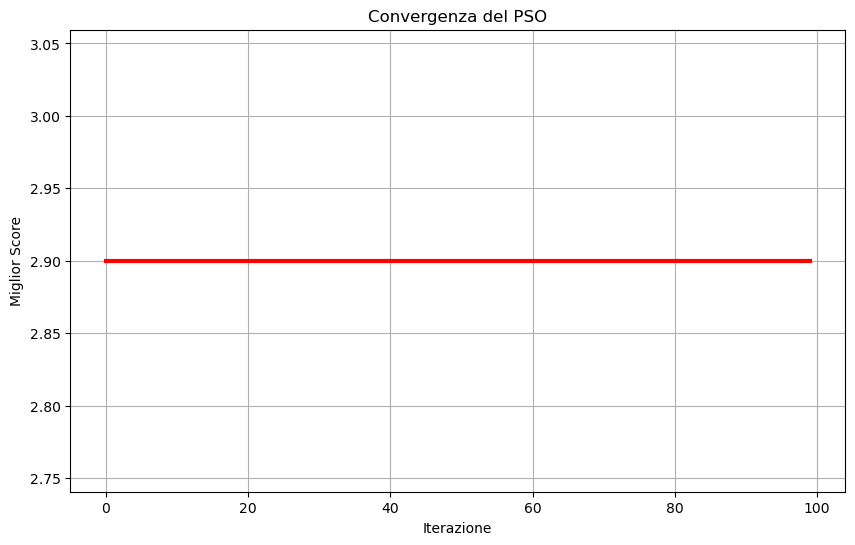

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(history, 'r-', linewidth=3)
plt.title('Convergenza del PSO')
plt.xlabel('Iterazione')
plt.ylabel('Miglior Score')
plt.grid(True)
plt.show()

## Distribuzione delle particelle nel Simplesso

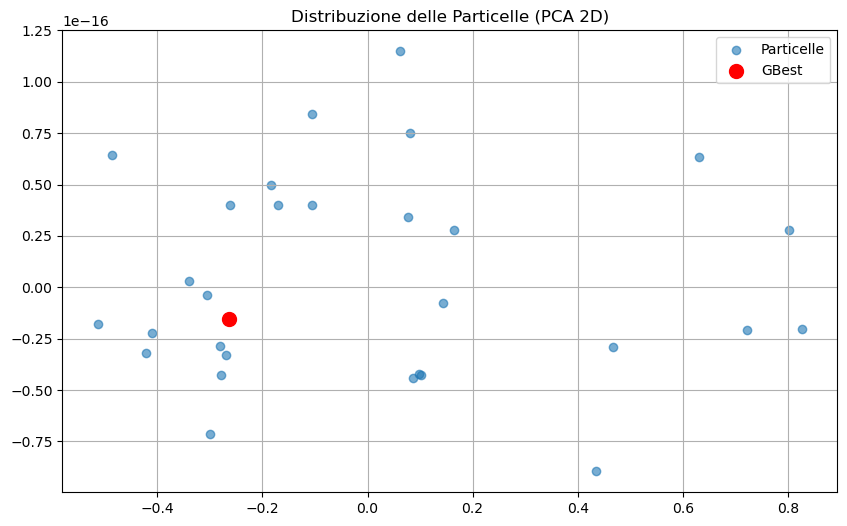

In [60]:
from sklearn.decomposition import PCA

# Applica PCA con n_components <= n_features
pca = PCA(n_components=2)  # Usa 2 invece di 3
projected_particles = pca.fit_transform(particles)

# Plot 2D
plt.figure(figsize=(10, 6))
plt.scatter(projected_particles[:, 0], projected_particles[:, 1], alpha=0.6, label='Particelle')
plt.scatter(projected_particles[0, 0], projected_particles[0, 1], color='red', s=100, label='GBest')
plt.title('Distribuzione delle Particelle (PCA 2D)')
plt.legend()
plt.grid(True)
plt.show()

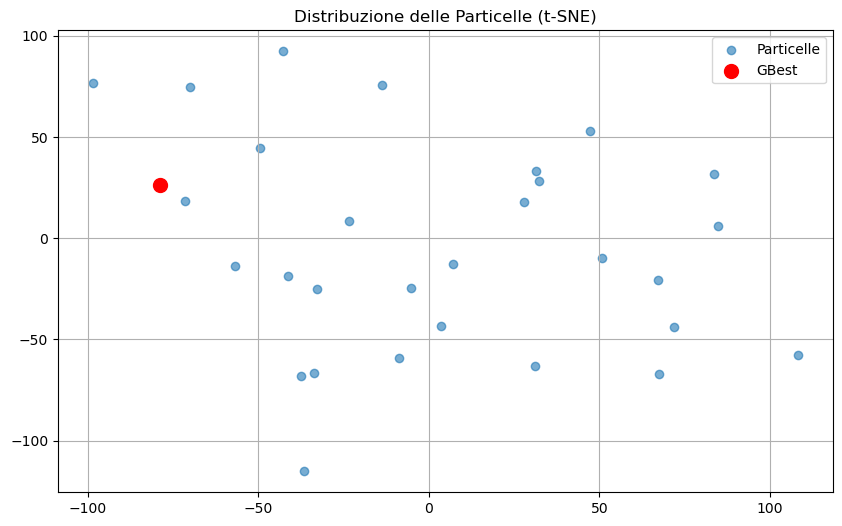

In [61]:
from sklearn.manifold import TSNE

# Estrai le posizioni finali delle particelle
particles = pso.positions

# Applica t-SNE per proiettare in 2D
tsne = TSNE(n_components=3, random_state=42, perplexity=min(10, len(particles)-1))
projected_particles = tsne.fit_transform(particles)

plt.figure(figsize=(10, 6))
plt.scatter(projected_particles[:, 0], projected_particles[:, 1], alpha=0.6, label='Particelle')
plt.scatter(projected_particles[0, 0], projected_particles[0, 1], color='red', s=100, label='GBest')
plt.title('Distribuzione delle Particelle (t-SNE)')
plt.legend()
plt.grid(True)
plt.show()

# Simplex Plot

In [10]:
import plotly.graph_objects as go
best_position_choice = np.append(0, best_position_choice)  # Aggiungi lo 0 iniziale (v0 = 0)
best_position_choice = best_position_choice / best_position_choice.sum()  # Normalizza

# Vertici del simplesso 3D
vertices = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Plot ternario
fig = go.Figure(go.Scatterternary({
    'mode': 'markers',
    'a': [best_position_choice[0]],
    'b': [best_position_choice[1]],
    'c': [best_position_choice[2]],
    'marker': {'color': 'red', 'size': 12},
    'name': 'Posizione Ottimale'
}))

fig.update_layout({
    'title': 'Simplesso 3D per Choice (k=3)',
    'ternary': {
        'sum': 1,
        'aaxis': {'title': 'v0'},
        'baxis': {'title': 'v1'},
        'caxis': {'title': 'v2'}
    }
})

fig.show()


# Multiple Run

## Confronto Preference/Choice

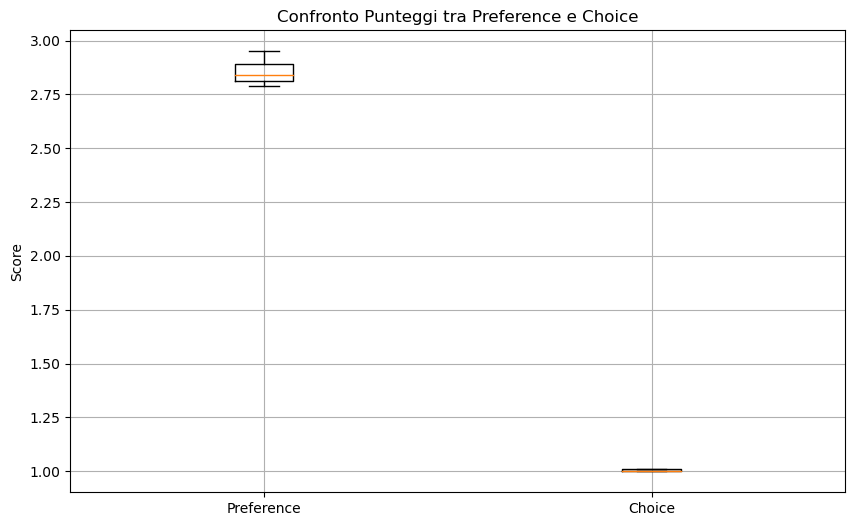

In [31]:
# multiple run
n_runs = 5
preference_scores = []
choice_scores = []

for _ in range(n_runs):
    # Preference
    pso_pref = SimplexPSO(n_particles=30, dim=np.math.factorial(k)-1, objective_func=Preference, max_iter=100)
    _, score_pref, _ = pso_pref.optimize()
    preference_scores.append(score_pref)
    
    # Choice
    pso_choice = SimplexPSO(n_particles=30, dim=k-1, objective_func=Choice, max_iter=100)
    _, score_choice, _ = pso_choice.optimize()
    choice_scores.append(score_choice)

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([preference_scores, choice_scores], labels=['Preference', 'Choice'])
plt.title('Confronto Punteggi tra Preference e Choice')
plt.ylabel('Score')
plt.grid(True)
plt.show()